# 1). BMI Class prediction by using K-NN

In [1]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Sample data
X = np.array([[158, 64], [170, 86], [183, 84], [191, 80], [155, 49], 
              [163, 59], [180, 67], [158, 54], [170, 67]])
y = np.array(['normal', 'overweight', 'overweight', 'overweight', 
              'underweight', 'normal', 'overweight', 'normal', 'normal'])

# Create KNN classifier 
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier 
knn.fit(X, y)

# Predict for a new sample
height = 165
weight = 75
X_new = np.array([[height, weight]])
prediction = knn.predict(X_new)
print("For height:", height, "and weight:", weight, "the predicted BMI class is", prediction[0])


For height: 165 and weight: 75 the predicted BMI class is normal


# 6). Build a desicion tree classifier to predict the color of a new object based on its size and shape.

In [2]:
# 6). Build a desicion tree classifier to predict the color of a new object based on its size and shape.

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the training data
data = [
    ['Small', 'Round', 'Red'],
    ['Large', 'Square', 'Blue'],
    ['Small', 'Round', 'Green']
]

# Extract features (size and shape) and labels (color)0000
features = [[row[0], row[1]] for row in data]
labels = [row[2] for row in data]

# Encode categorical features and labels
size_encoder = LabelEncoder()
shape_encoder = LabelEncoder()
color_encoder = LabelEncoder()

features_encoded = [
    [size_encoder.fit_transform([row[0]])[0], shape_encoder.fit_transform([row[1]])[0]]
    for row in features
]

labels_encoded = color_encoder.fit_transform(labels)

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier()

# Train the decision tree classifier
classifier.fit(features_encoded, labels_encoded)

# Predict the color for a new object
new_object_size = 'Small'
new_object_shape = 'Round'

new_object_encoded = [
    size_encoder.transform([new_object_size])[0],
    shape_encoder.transform([new_object_shape])[0]
]

predicted_color_encoded = classifier.predict([new_object_encoded])[0]
predicted_color = color_encoder.inverse_transform([predicted_color_encoded])[0]

print(f"For an object with size {new_object_size} and shape {new_object_shape}, the predicted color is: {predicted_color}")


For an object with size Small and shape Round, the predicted color is: Blue


## 5). Loan application

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('C:/Users/Dell/OneDrive/Desktop/New folder (5)/loan_approved.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         601 non-null    object
 1   Married        611 non-null    object
 2   Dependents     599 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  582 non-null    object
 5   Property_Area  614 non-null    object
dtypes: object(6)
memory usage: 28.9+ KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 24.1 KB


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

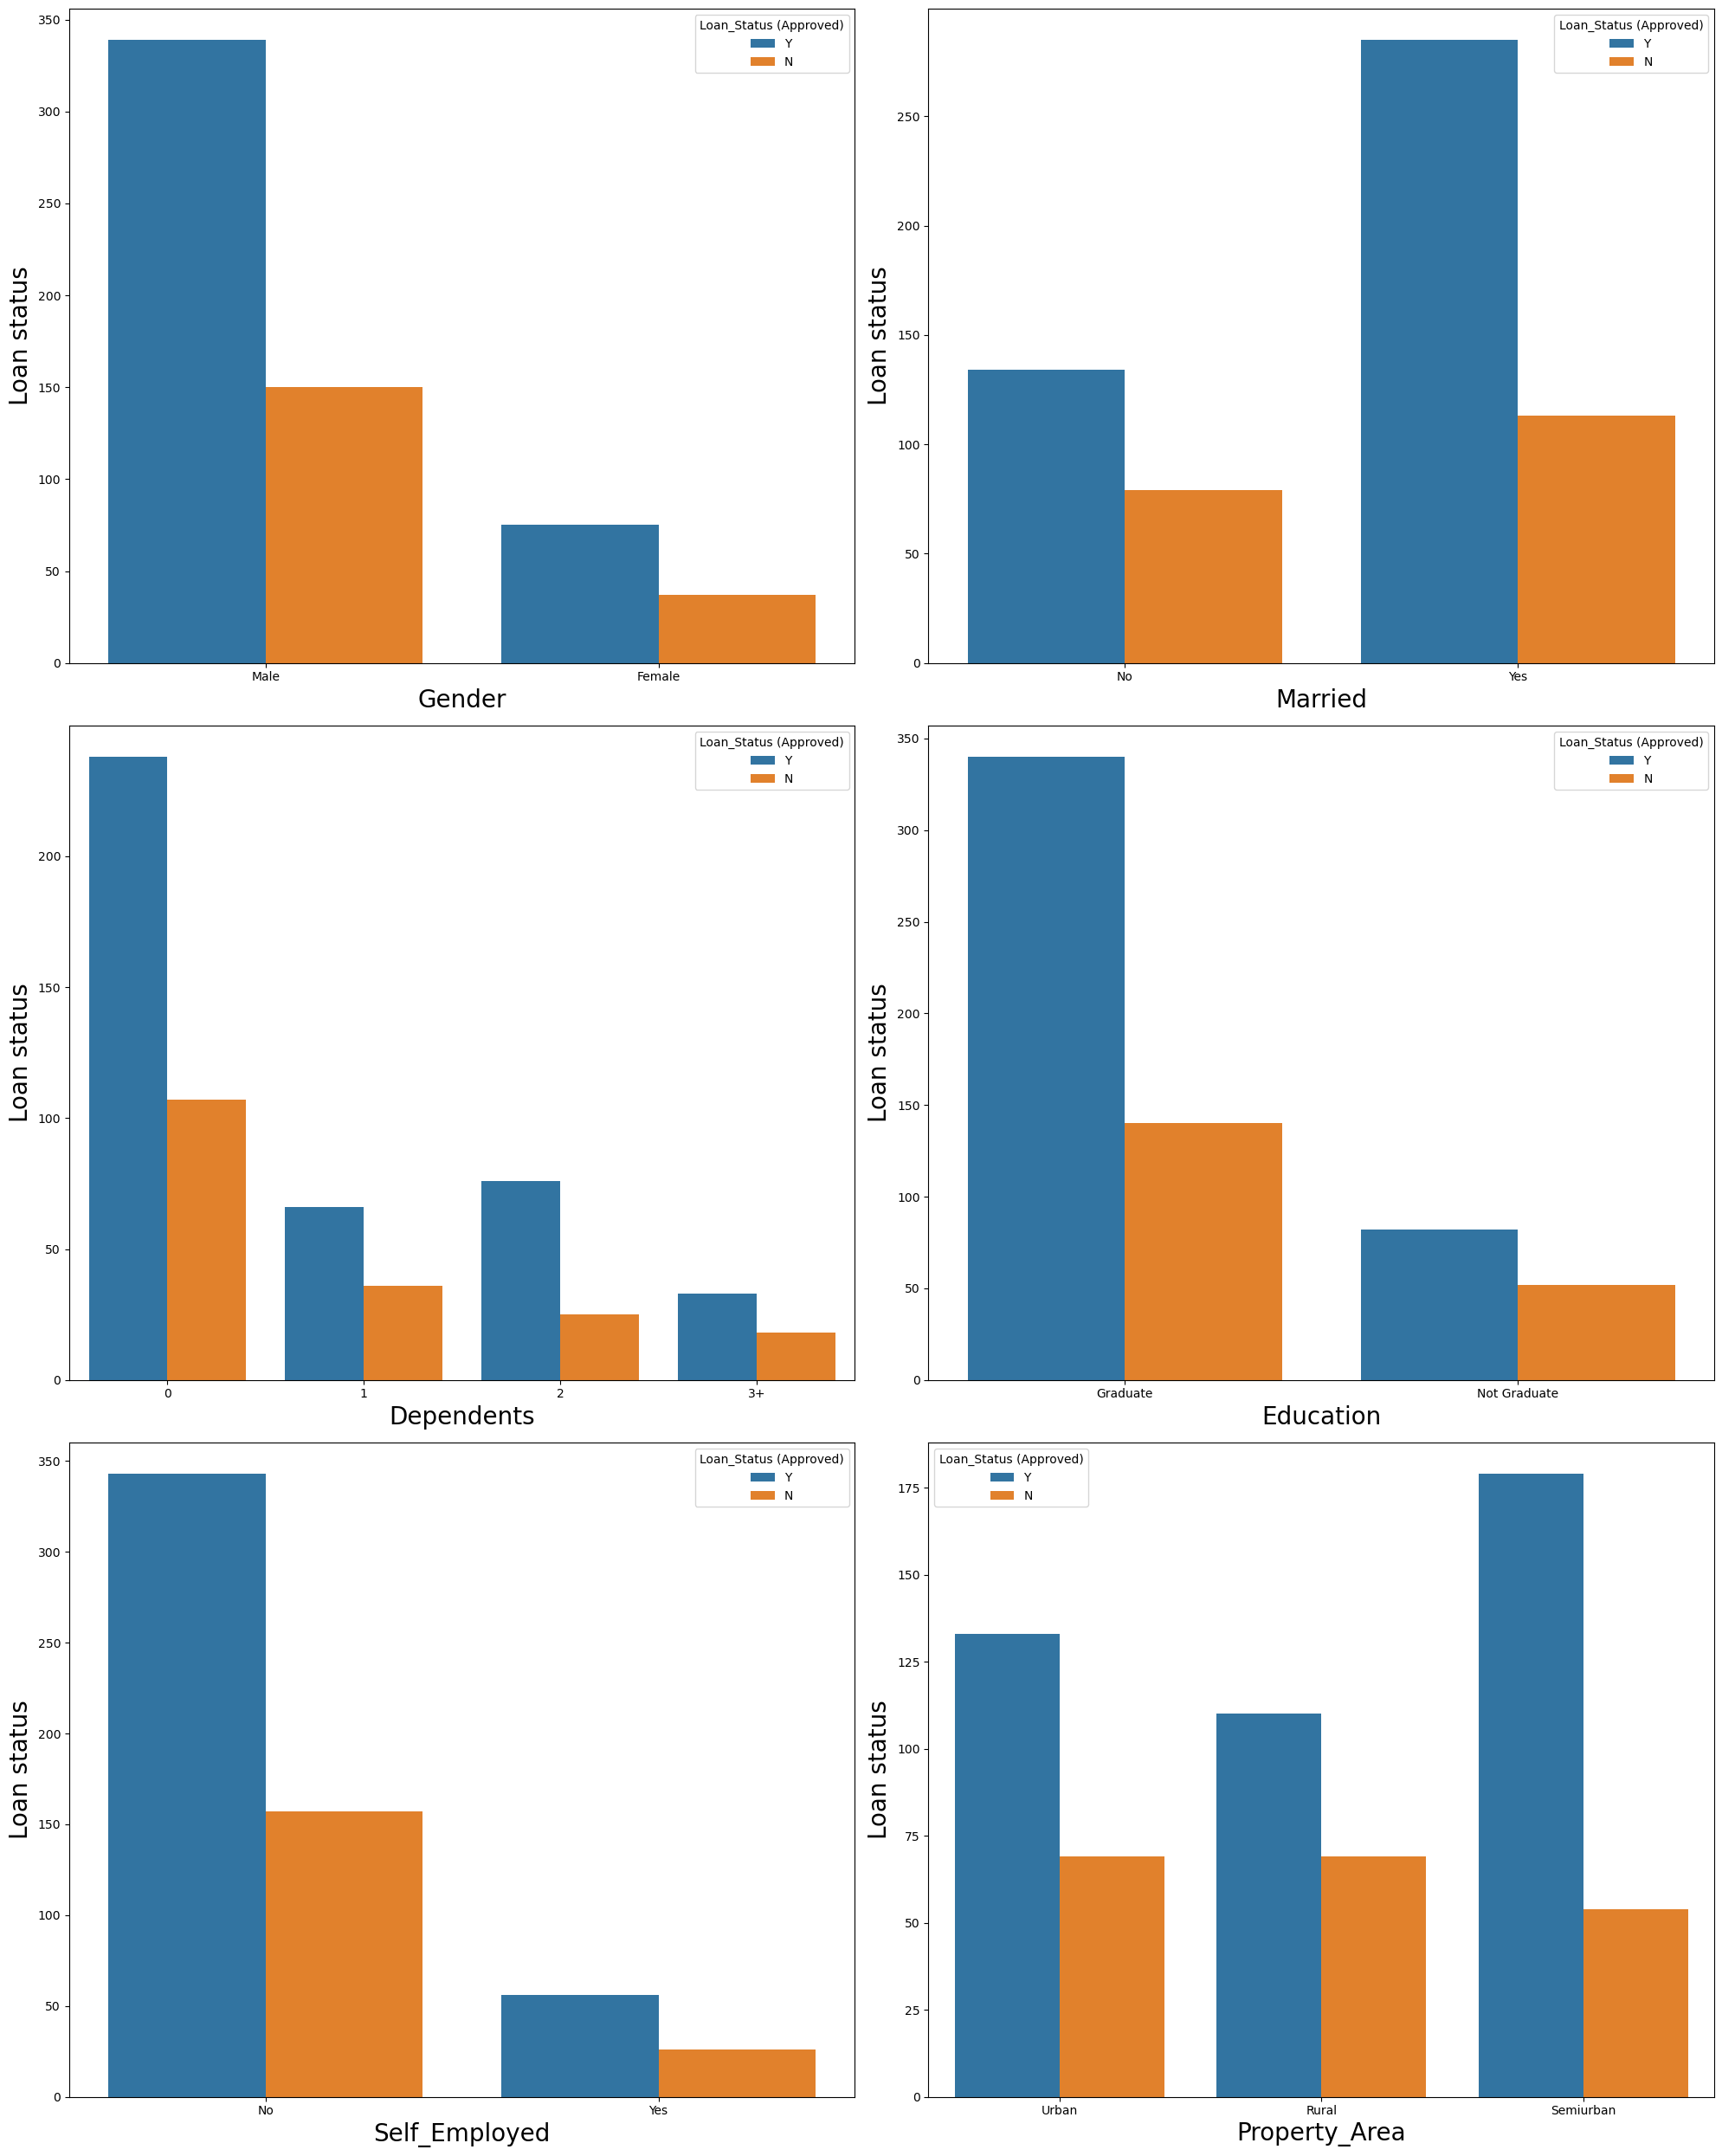

In [8]:


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
  plt.subplot(3,2,plotnumber)
  sns.countplot(x=data1[column],hue=data['Loan_Status (Approved)'])
  plt.xlabel(column,fontsize=20)
  plt.ylabel('Loan status', fontsize=20)
  plotnumber += 1
plt.tight_layout()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

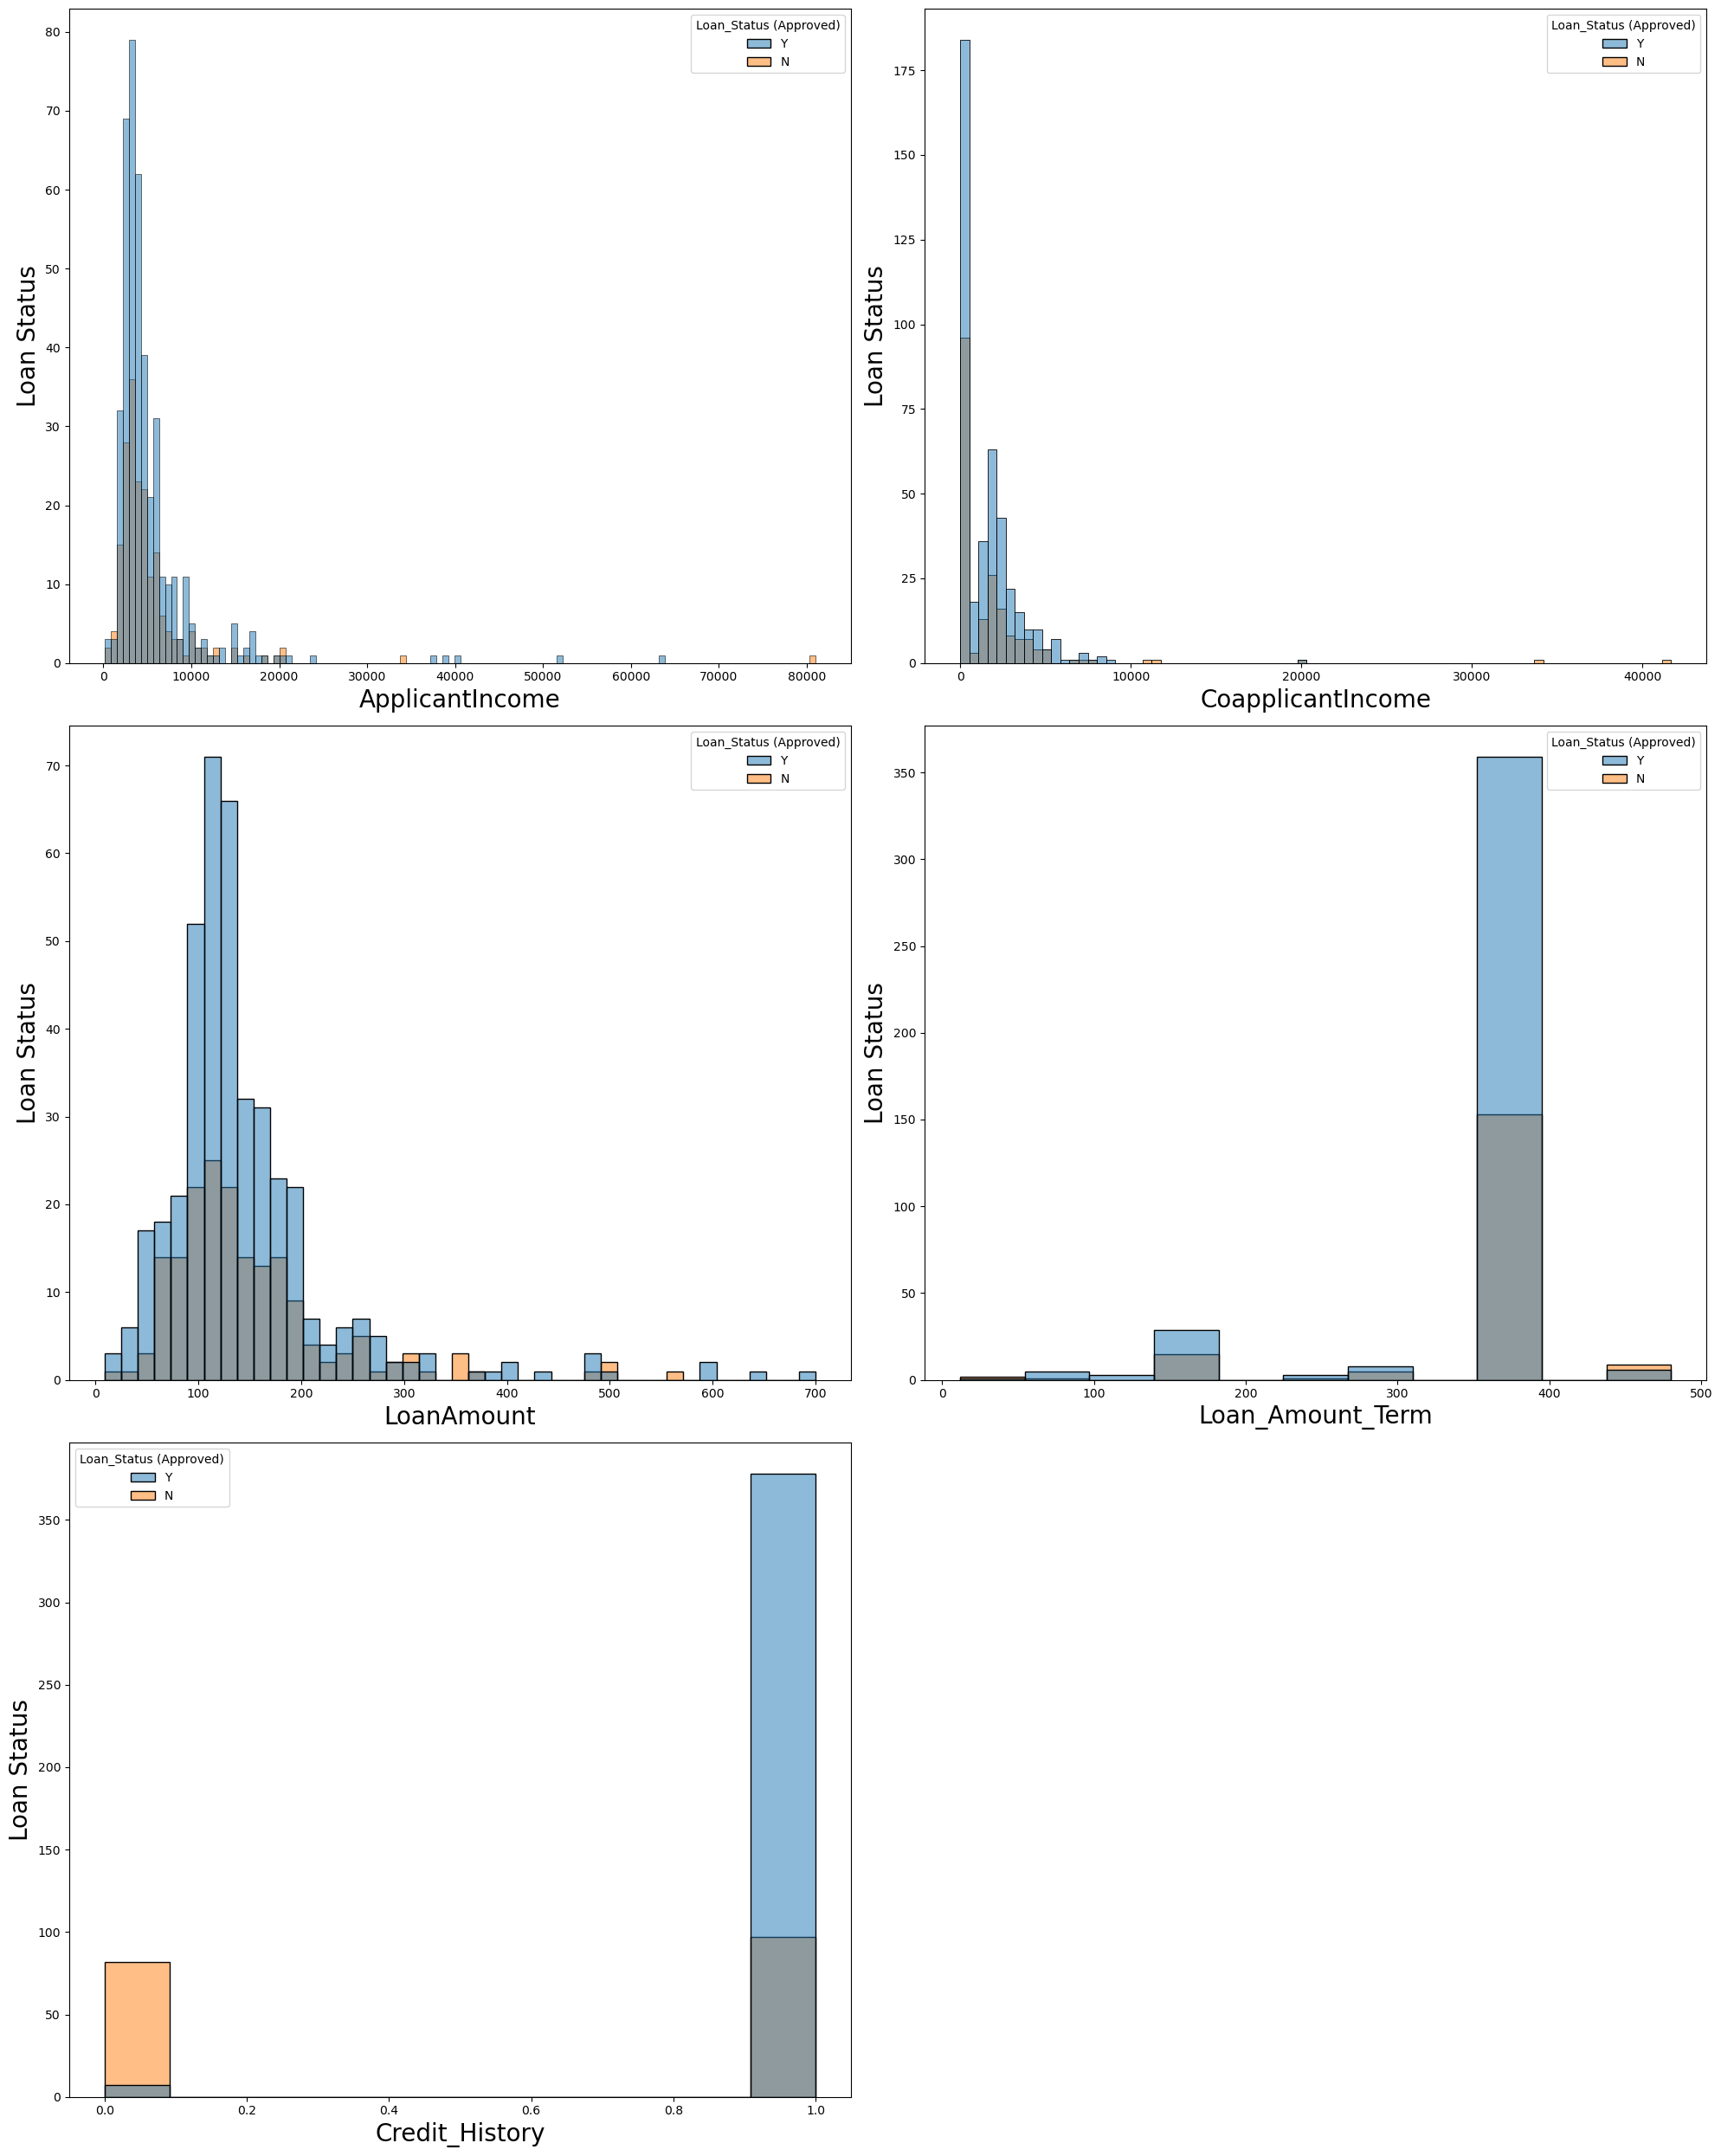

In [9]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the columns
    plt.subplot(3,2,plotnumber)
    sns.histplot(x=data2[column],hue=data['Loan_Status (Approved)'])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()